# Исследование закономерностей, определяющих успешность компьютерных игр

### 1. Обзор данных

In [1]:
# импорт библиотек pandas, numpy, seaborn, matplotlib и stats
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats as st

# отключаем предупреждения Anaconda
import warnings
warnings.simplefilter('ignore')

# отображение графиков в jupyter'e
%matplotlib inline
import matplotlib.pyplot as plt

# графики в svg выглядят более четкими
%config InlineBackend.figure_format = 'svg' 

# изменение дефолтного размера графиков
from pylab import rcParams
rcParams['figure.figsize'] = 11, 5

Составим первое представление об исходных данных.

In [2]:
# чтение таблицы с данными и сохранение в data
try:
    data = pd.read_csv('games.csv')
except:
    data = pd.read_csv('/datasets/games.csv')

Выведем первые 20 строчек датафрейма `data` на экран.

In [3]:
data.head(20)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [4]:
# получение общей информации о данных в таблице data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Итак, в таблице 11 столбцов и 16715 строк. Данные представлены двумя типами - `object` и `float64`. Мы видим, что отдельные столбцы требуют изменения типа данных в нем, а так же в таблице присутствуют множественные пропущенные значения. Названия столбцов необходимо привести к единому стилю.

#### Вывод

Первичный обзор показал, что перед исследованием данные требуют дополнительной подготовки, а именно: 

1. Приведение названий всех столбцов к единому стилю.
2. Изменение типа данных в столбцах `Year_of_Release` и `user_score`.
3. Заполнение пропусков там, где это возможно. 

Приступим к этапу предобработки данных.

### 2. Предобработка данных

#### Приведение названий столбцов к единому стилю

Приведем все названия столбцов в таблице к единому стилю.

In [5]:
# приведение названий столбцов data к нижнему регистру
data.columns = data.columns.str.lower()
data.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

Названия столбцов приведены к единому стилю. Приступим к изменению типов данных.

#### Обработка пропусков

Выведем количество пропущенных значений для каждого столбца.

In [6]:
# подсчёт пропусков
data.isna().sum().sort_values()

platform              0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
name                  2
genre                 2
year_of_release     269
user_score         6701
rating             6766
critic_score       8578
dtype: int64

In [7]:
# подсчёт процента пропусков
data.isna().sum() / len(data) * 100

name                0.011965
platform            0.000000
year_of_release     1.609333
genre               0.011965
na_sales            0.000000
eu_sales            0.000000
jp_sales            0.000000
other_sales         0.000000
critic_score       51.319174
user_score         40.089740
rating             40.478612
dtype: float64

Отфильтруем две строки, в которых пропущены названия игр и жанра и оценим их на значимость.

In [8]:
# срез строк с пропущенными значения в столбцах 'name' и 'genre'
data.loc[(data['name'].isna() == True) & (data['genre'].isna() == True)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


В данных двух строках заполнены только значения платформы, года релиза и выручки. Так как это игры 1993 года выпуска, у нас нет информации по их названию и жанру, а процент пропущенных значений составляет 0.01%, удалим данные строчки из датасета, так как это не повлияет на достоверность исследования.

In [9]:
# удаление из датафрнейма строк с пропущенными значениями в столбцах 'name' и 'genre'
data = data.loc[(data['name'].isna() == False) & (data['genre'].isna() == False)]

Отфильтруем строки, в которых пропущен год релиза игры и оценим их значимость.

In [10]:
# срез строк с пропущенными значения в столбце 'year_of_release'
data.loc[data['year_of_release'].isna() == True].sample(20)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
5932,Shrek the Third,DS,NaN,Action,0.26,0.01,0.00,0.02,70.0,6.5,E
10764,Luminous Arc 2 (JP sales),DS,NaN,Role-Playing,0.00,0.00,0.10,0.00,NaN,NaN,NaN
9761,Saru! Get You! Million Monkeys,PS2,NaN,Platform,0.00,0.00,0.12,0.00,NaN,NaN,NaN
1650,NASCAR Thunder 2003,PS2,NaN,Racing,0.60,0.46,0.00,0.16,84.0,8.7,E
2169,Yakuza 4,PS3,NaN,Action,0.15,0.13,0.63,0.05,78.0,8,M
8212,Teen Titans,GBA,NaN,Action,0.13,0.05,0.00,0.00,61.0,tbd,E10+
4205,Tiger Woods PGA Tour 07,Wii,NaN,Sports,0.43,0.00,0.00,0.04,71.0,6.9,E
15754,Virtua Quest,PS2,NaN,Role-Playing,0.01,0.01,0.00,0.00,53.0,7.6,T
7848,Pet Zombies,3DS,NaN,Simulation,0.18,0.00,0.00,0.01,NaN,tbd,T


Мы видим, что значения пропущены в строках с разными платформами и жанрами. 

Заполнить данные пропуски не представляется возможным, так как на разных платформах игры могут выходить с разницей в несколько лет, а год в названии игры не всегда говорит о том, что игра вышла именно в этот год. Так, например, в FIFA играх в названии обычно указан год следующий за тем, в который состоялся релиз игры, в связи с особенностями геймплэя. 

Также, мы можем отметить, что практически у всех игр из данного среза маленькие продажи.

Так как общее количество пропущенных значений в данном столбце составляет 1,6%, мы можем удалить данные пропуски.

In [11]:
# удаление из датафрнейма строк с пропущенными значениями в столбце 'year_of_release'
data = data.loc[data['year_of_release'].isna() == False]

В столбцах `user_score` и `rating` пропущено примерно 40% значений, а в столбце `critic_score` около половины всех значений. Удалить такое количество пропусков мы не можем, так как это значительно повлияет на исследование. Отфильтруем строки, в которых пропущены данные значения и попробуем найти закономерности в пропусках.

In [12]:
# срез строк с пропущенными значения в столбцах 'user_score', 'rating' и 'critic_score'
data.loc[(data['user_score'].isna() == True) | \
         (data['rating'].isna() == True) | \
         (data['critic_score'].isna() == True)].sample(20)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
14559,Smashing Drive,GBA,2004.0,Racing,0.02,0.01,0.00,0.00,NaN,tbd,E
12259,Dream C Club,X360,2009.0,Simulation,0.00,0.00,0.07,0.00,NaN,NaN,NaN
12925,Batman: A Telltale Game Series,PS3,2016.0,Adventure,0.01,0.04,0.00,0.01,NaN,NaN,NaN
3114,Toy Story 3: The Video Game,PSP,2010.0,Action,0.27,0.24,0.00,0.14,NaN,NaN,NaN
9345,Paperboy / Rampage,GBA,2005.0,Misc,0.10,0.04,0.00,0.00,NaN,tbd,E
361,WWF SmackDown!,PS,2000.0,Fighting,2.01,1.35,0.06,0.16,NaN,NaN,NaN
16028,RollerCoaster Tycoon: Gold Edition,PC,2002.0,Strategy,0.01,0.00,0.00,0.00,NaN,tbd,E
1278,Wario Land II,GB,1997.0,Platform,0.70,0.35,0.39,0.04,NaN,NaN,NaN
15000,Spy Hunter / Super Sprint,GBA,2005.0,Racing,0.02,0.01,0.00,0.00,NaN,NaN,NaN
7119,New Carnival Games,DS,2010.0,Misc,0.16,0.05,0.00,0.02,NaN,tbd,E


Мы видим, что пропуски в столбцах с оценками критиков, пользователей и организации ESRB встречаются у разных платформ, игр разных годов выпуска и разных жанров, поэтому на первый взгляд сложно определить природу появления пропусков. Из схожего у всех можно отметить только маленькие продажи.

Также, в столбце с оценками пользователей есть аномальное значение "tbd", которое говорит о том, что рейтинг будет подгружен, но позже. 

Построим для пропущенных значений в каждом столбце распределения и попробуем по ним предположить по какой причине было допущено такое значительное количество данных.

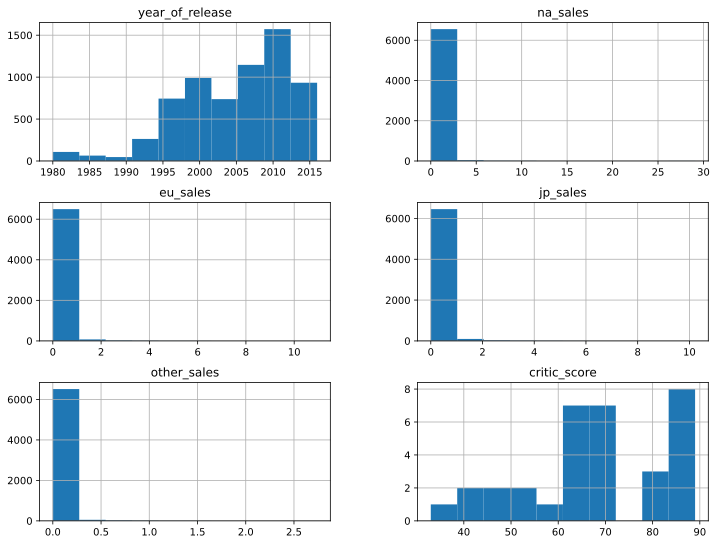

In [13]:
# распределение пропущенных значений в столбце 'user_score'
data.loc[data['user_score'].isna() == True].hist(figsize=(12, 9))
None

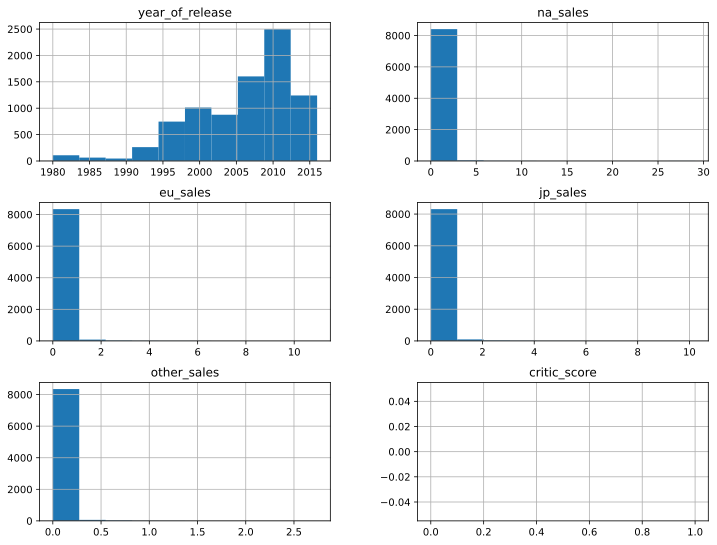

In [14]:
# распределение пропущенных значений в столбце 'critic_score'
data.loc[data['critic_score'].isna() == True].hist(figsize=(12, 9))
None

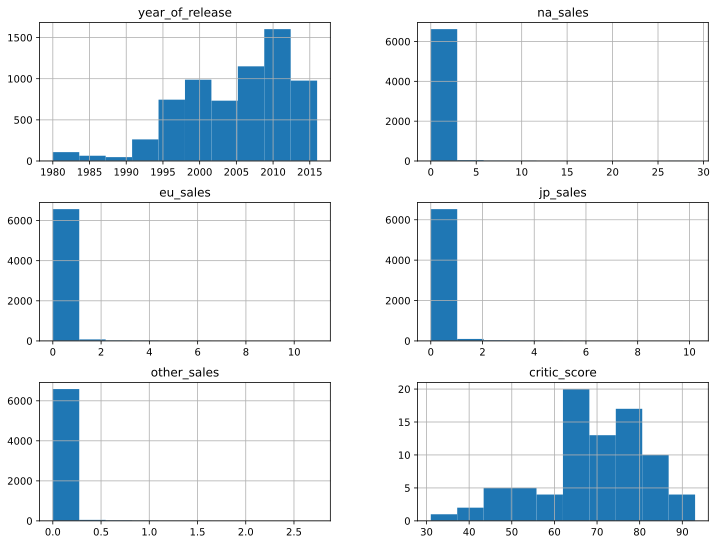

In [15]:
# распределение пропущенных значений в столбце 'rating'
data.loc[data['rating'].isna() == True].hist(figsize=(12, 9))
None

Проанализировав графики мы видим, что тенденция распределения пропусков в столбцах `user_score`, `critic_score` и `rating` схожа - пропуски в основном допущены в играх, которые выходили после 1995 года, с минимальными продажами, что дает нам возможность предположить, что пропуски в рейтингах пропущены в связи с тем, что в 21 веке начался бум компьютерных игр, их стало выходить очень много, но те игры, на которые не было оставлено отзывов, плохо продавались, или наоборот, игры, которые оказались для пользователей неинтересными на фоне успешных игр, продались плохо и не получили отзывы. Этот вопрос мы изучим в дальнейшем исследовании.

На данном этапе заполнить данные пропуски и не исказить результаты исследования не представляется возможным, поэтому мы оставим их как есть. Значения `'tbd'` заменим на пропуски, так как их мы также не можем заполнить достоверно. Пропущенные значения в столбце `'rating'` заменим на `'no rating'`.


In [16]:
# заполнение пропущенных значений в столбце 'rating'
data.loc[data.rating.isna(), 'rating'] = 'no rating' 

# замена значения 'tbd' в стобце 'user_score' на пропуски
data.loc[data.user_score == 'tbd', 'user_score'] = np.nan  

# подсчёт пропусков
data.isna().sum().sort_values()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
rating                0
critic_score       8461
user_score         8981
dtype: int64

Мы заполнили те пропуски в данных, которые смогли. Можно приступать к изменению типов данных в столбцах.

#### Изменение типов данных

При первичном обзоре данных мы обратили внимание на то, что в двух столбцах таблицы требуется изменение типов данных. Изменим тип данных в столбце `year_of_release` на `int`, а в столбце `user_score` на `float`.

In [17]:
# изменение типов данных в столбце 'year_of_release' и 'user_score'
data.user_score = data.user_score.astype('float64')
data.year_of_release = data.year_of_release.astype('int64')

В таблице отсутствует столбец с суммарной выручкой для каждой игры со всех регионов продаж. Подсчитаем ее и добавим в столбец `total_sales`.

In [18]:
# создание нового столбца 'total_sales', включающего в себя сумму выручки со всех рынков
data['total_sales'] = data[['na_sales','eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,no rating,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,no rating,31.38


####  Удаление дубликатов

Проверим таблицу на наличие дубликатов.

In [19]:
# определение количества явных дубликатов
data.duplicated().sum()

0

Дубликаты в данных не обнаружены.

#### Вывод

Нами были обнаружены пропуски данных в различных столбцах, возникших по разным причинам. 

Так, пропуски в столбцах `name` и `genre` были вероятнее всего допущены в связи с тем, что эти 2 игры были выпущены аж в 1993. Эти пропуски мы удалили, так как их было всего 2 строки.

Мы обнаружили пропущенные значения в столбце с годом релиза игры. Заполнить данные пропуски нам не представилось возможным, так как на разных платформах игры могут выходить с разницей в несколько лет, а год в названии игры не всегда говорит о том, что игра вышла именно в этот год. Было отмечено, что практически у всех игр из данного среза маленькая выручка с продаж, а так как общее количество пропущенных значений в данном столбце составляет 1,6%, мы удалили данные пропуски.

В столбцах `user_score` и `rating` пропущено примерно 40% значений, а в столбце `critic_score` около половины всех значений. Удалить такое количество пропусков мы не смогли, так как это значительно повлияло бы на исследование. Также, в столбце с оценками пользователей мы обнаружили аномальное значение "tbd", которое говорит о том, что рейтинг будет подгружен, но позже. Внимательно проанализировав распределение данных пропусков, мы обратили внимание на то, что что тенденция распределения пропусков в столбцах `user_score`, `critic_score` и `rating` схожа - пропуски в основном допущены в играх, которые выходили после 1995 года, с минимальной выручкой, что дало нам возможность предположить, что пропуски в рейтингах пропущены в связи с тем, что в 21 веке начался бум компьютерных игр, их стало выходить очень много, но те игры, на которые не было оставлено отзывов, плохо продавались, или наоборот, игры, которые оказались для пользователей неинтересными на фоне успешных игр, продались плохо и не получили отзывы. Ответ на этот вопрос мы получим в дальнейшем исследовании.

На данном этапе заполнить данные пропуски и не исказить результаты исследования не представлялось возможным, поэтому мы оставили их как есть. Значения 'tbd' заменили на пропуски, так как их мы также не можем заполнить достоверно. Пропущенные значения в столбце `'rating'` заменим на `'no rating'`.

Данные подготовлены к дальнейшему анализу, можно приступать к следующему этапу исследования.

### 3. Исследовательский анализ данных

Рассмотрим, как менялась динамика количества выпускаемых игр с годами. 

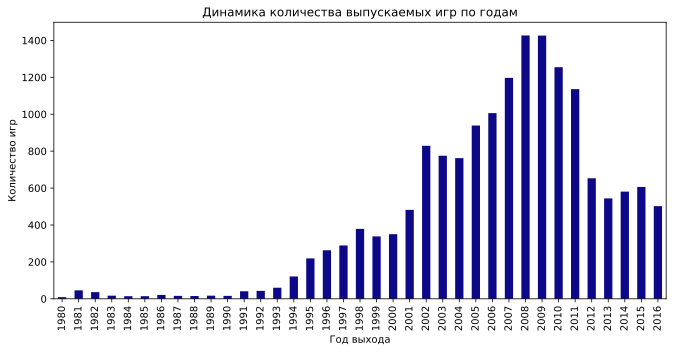

In [20]:
# построение графика динамики количества выпускаемых игр
data.groupby('year_of_release')['name'].count().plot(kind='bar', grid=False, colormap='plasma')
plt.title('Динамика количества выпускаемых игр по годам')
plt.xlabel('Год выхода')
plt.ylabel('Количество игр')
None

Мы видим, что настоящий бум выпуска игр пришелся на 2008 и 2009 год, в эти года вышло примерно по 1400 игр в год.

До 2001 года компьютерные игры были слабо развиты, затем в период с 2005 по 2007 год виден стабильный рост количества выпускаемых в год игр почти до 1200. При этом важно отметить, что с 2010 года количество выпускаемых игр начало снижаться и к 2015 году оказалось даже ниже уровня начала двухтысячных годов - около 600 штук в год в 2015 году.

Учитывая высокую динамичность рынка, мы можем сделать вывод, что для дальнейшего анализа нам потребуются данные по платформам, возникшим не ранее 3 лет назад по отношению к 2017 году, на который нам нужно сделать прогноз и запланировать рекламные кампании. Так мы сможем выделить успешные платформы, которые на 2017 год будут находиться в периоде финального роста или выйдут на плато. Таким образом, для анализа возьмем данные за 2014 - 2016 года.

Рассмотрим, как с годами менялись продажи по платформам. Для этого выберем платформы с наибольшими суммарными продажами и построим распределение по годам.

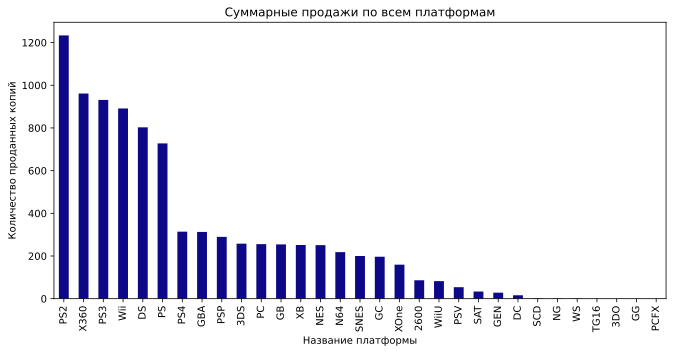

In [21]:
# построение графика суммарных продаж по всем платформам
grouped_platforms_data = data.groupby('platform')['total_sales'].sum().sort_values(ascending=False)
grouped_platforms_data.plot(kind='bar', grid=False, colormap='plasma')
plt.title('Суммарные продажи по всем платформам')
plt.xlabel('Название платформы')
plt.ylabel('Количество проданных копий')
None

На графике хорошо видно, что PS2, X360, PS3, Wii, DS и PS - платформы с наибольшими суммарными продажами. Построим график распределения выручки по годам для данных платформ.

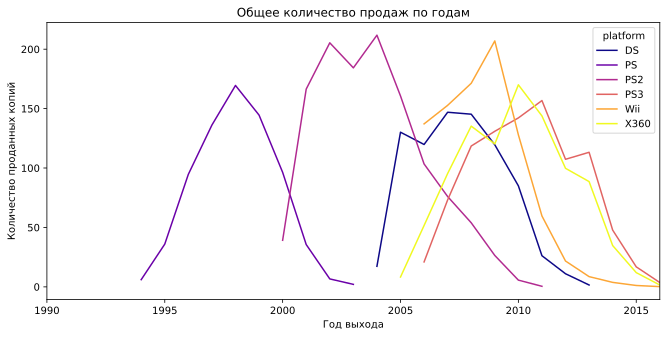

In [22]:
# построение графика распределения выручки по годам для данных платформ.
platforms = ['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS']
(
    data.query('platform in @platforms')
    .pivot_table(index='year_of_release',
                 columns='platform',
                 values='total_sales',
                 aggfunc='sum')
    .plot(kind='line',
          xlim=(1990, 2016),
          colormap='plasma')
)
plt.title('Общее количество продаж по годам')
plt.xlabel('Год выхода')
plt.ylabel('Количество проданных копий')
None

Проанализировав график, мы видим, что срок жизни платформы в среднем составляет от 8 до 11 лет. При этом приблизительно до 2004 года новые платформы появлялись примерно каждые 5 лет, а около 2005 года популярные платформы DS, PS3, Wii и X360 стали выходить одна за одной, однако платформы PS3 и X360 оставались актуальными дольше, чем Wii и DS.

Для дальнейшего анализа создадим новый датафрейм, в котором оставим данные только за актуальный период с 2014 по 2016 год.

In [23]:
# создание нового датафрейма actual_data
actual_data = data.query('year_of_release >= 2014')
actual_data.info()
actual_data

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1689 entries, 31 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             1689 non-null   object 
 1   platform         1689 non-null   object 
 2   year_of_release  1689 non-null   int64  
 3   genre            1689 non-null   object 
 4   na_sales         1689 non-null   float64
 5   eu_sales         1689 non-null   float64
 6   jp_sales         1689 non-null   float64
 7   other_sales      1689 non-null   float64
 8   critic_score     718 non-null    float64
 9   user_score       888 non-null    float64
 10  rating           1689 non-null   object 
 11  total_sales      1689 non-null   float64
dtypes: float64(7), int64(1), object(4)
memory usage: 171.5+ KB


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,no rating,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,no rating,11.68
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,no rating,7.98
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,no rating,0.01
16707,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,NaN,NaN,no rating,0.01
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,no rating,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,no rating,0.01


У нас получилась выборка из 1689 строк. Эти данные помогут нам построить прогноз на 2017 год.

Построим график выручки по годам и платформам из актуальной выборки.

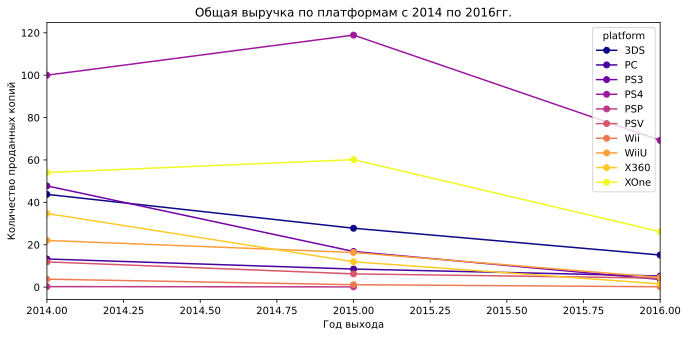

In [24]:
# построение графика распределения выручки всех платформ с 2014 по 2016 год
(
    actual_data.pivot_table(index='year_of_release',
                columns='platform',
                values='total_sales',
                aggfunc='sum')
                .plot(kind='line',
                      style='o-',
                      xlim=(2014, 2016),
                      colormap='plasma')
)
plt.title('Общая выручка по платформам с 2014 по 2016гг.')
plt.xlabel('Год выхода')
plt.ylabel('Количество проданных копий')
None

В 2015 и в 2016 году по продажам лидировали 3 платформы - XOne, PS4 и 3DS. 

Однако необходимо обратить внимание на то, что учитывая, что средний цикл жизни у платформы от 8 до 11 лет, платформы XOne и PS4 только появились в 2013 году, а платформа 3DS создалась ранее 2012 года и к 2016 году уже технически устарела, поэтому мы не можем ее считать потенциально прибыльной на 2017 год. А платформы XOne и PS4 c 2014 по 2015 год росли. Учитывая то, что за 2016 год у нас имеются еще не все данные, то платформы XOne и PS4 можно считать потенциальными на 2017 год.

Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам, чтобы оценить распределение значений. Это позволит нам убедиться в правильности выбора перспективных платформ.

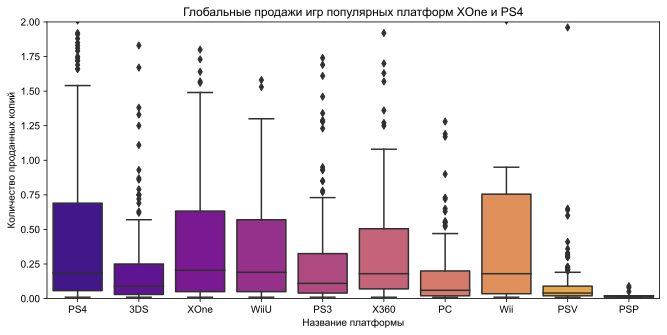

In [25]:
# построение ящика с усами по глобальным продажам игр в разбивке по двум потенциальным платформам XOne и PS4
sns.boxplot(x='platform', y='total_sales', data=actual_data, palette='plasma')
sns.set(style='whitegrid')
plt.title('Глобальные продажи игр популярных платформ XOne и PS4')
plt.ylim(0, 2)
plt.xlabel('Название платформы')
plt.ylabel('Количество проданных копий')
None

На графике мы можем убедиться в том, что действительно, платформы PS4 и XOne обладают наибольшей популярностью и потенциалом, так как распределение значений продаж игр на этих платформах самое большое - верхние границы усов находятся на уровне около 1.5 миллиона проданных копий. При этом границы квартилей и медиан также находятся на близком уровне, соответственно мы можем сделать вывод о схожести распределений продаж игр на данных платформах. На третьем месте идет платформа Nintendo WiiU, распределение также схоже с самыми популярными платформами, однако верхняя граница усов находится на меньшем уровне значений - чуть более 1.25 миллиона проданных копий.

Интересно отметить выбивающееся из всех распределение продаж игр на платформе Nintendo Wii - граница третьего квартиля находится на самой высокой границе - около 750 тысяч проданных копий, однако граница верхних усов не доходит даже до миллиона. Это может говорить нам о том, что на платформе Wii вышло больше игр, продающихся в диапазоне до 750 тысяч копий.

Теперь оценим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Возьмем для анализа наиболее популярную платформу - PS4. Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами.

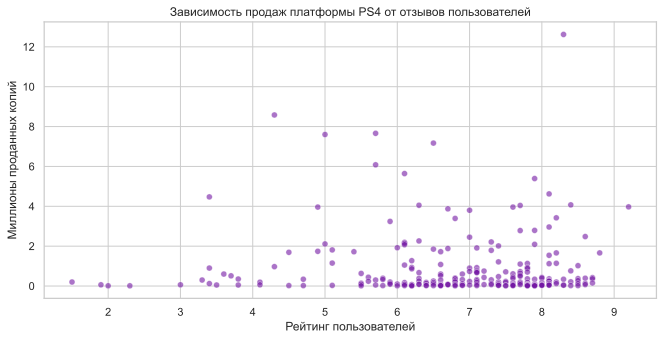

In [26]:
# построение диаграммы рассеяния зависимости продаж от отзывов пользователей
ps4 = actual_data.loc[actual_data.platform == 'PS4']

sns.scatterplot(x='user_score', 
                y='total_sales', 
                data=ps4, 
                color='#7318a3', 
                alpha=0.6)
sns.set(style='whitegrid')
plt.title('Зависимость продаж платформы PS4 от отзывов пользователей')
plt.xlabel('Рейтинг пользователей')
plt.ylabel('Миллионы проданных копий')
None

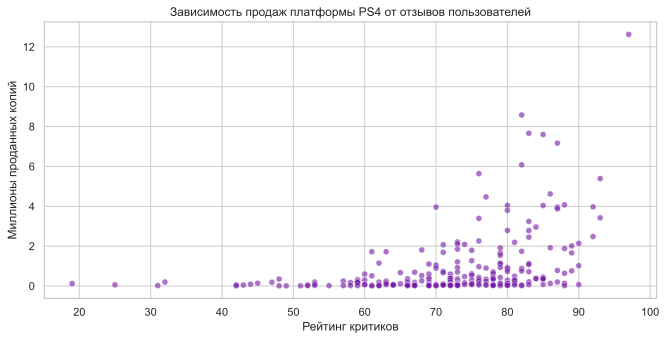

In [27]:
# построение диаграммы рассеяния зависимости продаж от отзывов критиков
sns.scatterplot(x='critic_score', 
                y='total_sales', 
                data=ps4, 
                color='#7318a3', 
                alpha=0.6)
sns.set(style='whitegrid')
plt.title('Зависимость продаж платформы PS4 от отзывов пользователей')
plt.xlabel('Рейтинг критиков')
plt.ylabel('Миллионы проданных копий')
None

In [28]:
# код ревьюера

print(actual_data.loc[(actual_data.platform == 'PS4') & (actual_data.user_score != 0) 
                      & (actual_data.critic_score != 0)].shape[0])

print(actual_data.loc[(actual_data.platform == 'PS4') & (actual_data.user_score != 0)].shape[0])
print(actual_data.loc[(actual_data.platform == 'PS4') & (actual_data.critic_score != 0)].shape[0])

376
376
376


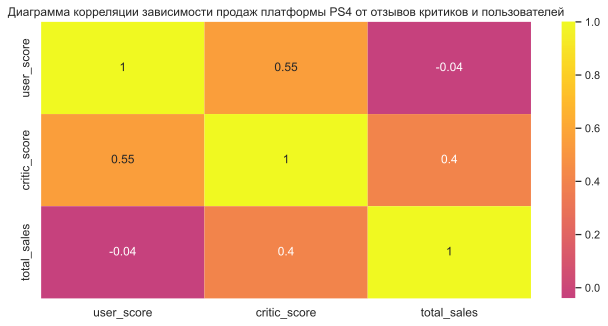

In [29]:
# рассчёт коэффициента корреляции Пирсона для продаж и отзывов
ps4[['user_score', 'critic_score', 'total_sales']].corr()
# построение диаграммы корреляции
sns.heatmap(ps4[['user_score', 'critic_score', 'total_sales']].corr(),
            xticklabels=ps4[['user_score', 'critic_score', 'total_sales']].corr().columns, 
            yticklabels=ps4[['user_score', 'critic_score', 'total_sales']].corr().columns,
            cmap='plasma',
            center=0,
            annot=True)
plt.title('Диаграмма корреляции зависимости продаж платформы PS4 от отзывов критиков и пользователей')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()
None


Изучив графики и матрицу корреляции, мы можем сделать вывод о том, что продажи незначительно зависят от отзывов критиков, в то время как с отзывами пользователей связи практически нет. Так, на первом графике значения распределены по большой площади и множество нулевых продаж находятся на уровне высоких пользовательских рейтингов. На втором графике - зависимости продаж от отзывов критиков значения чуть более упорядочены и стремятся в правую часть графика - к наибольшим значения оценок критиков. 

Сравним данные результаты с остальными платформами.

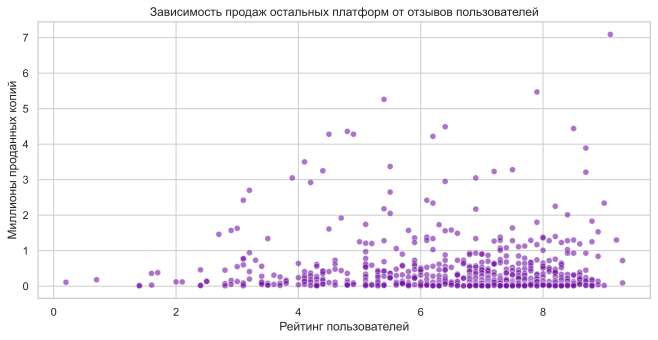

In [30]:
# построение диаграммы рассеяния зависимости продаж от отзывов пользователей
without_ps4 = actual_data.loc[actual_data.platform != 'PS4']

sns.scatterplot(x='user_score', 
                y='total_sales', 
                data=without_ps4, 
                color='#7318a3', 
                alpha=0.6)
sns.set(style='whitegrid')
plt.title('Зависимость продаж остальных платформ от отзывов пользователей')
plt.xlabel('Рейтинг пользователей')
plt.ylabel('Миллионы проданных копий')
None

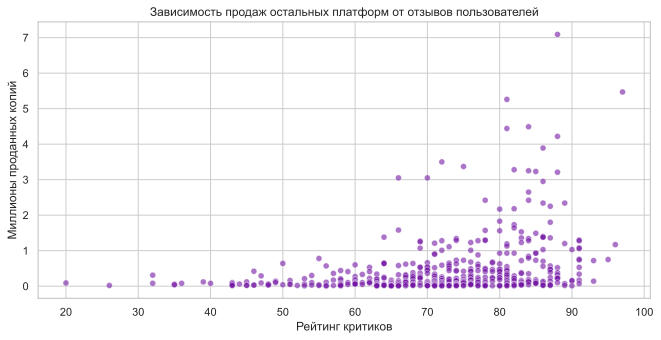

In [31]:
# построение диаграммы рассеяния зависимости продаж от отзывов критиков
sns.scatterplot(x='critic_score', 
                y='total_sales', 
                data=without_ps4, 
                color='#7318a3', 
                alpha=0.6)
sns.set(style='whitegrid')
plt.title('Зависимость продаж остальных платформ от отзывов пользователей')
plt.xlabel('Рейтинг критиков')
plt.ylabel('Миллионы проданных копий')
None

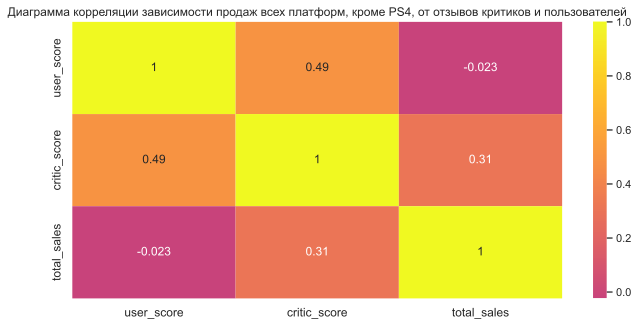

In [32]:
# рассчёт коэффициента корреляции Пирсона для выручки и отзывов
without_ps4[['user_score', 'critic_score', 'total_sales']].corr()

# построение диаграммы корреляции
plt.figure(figsize=(11,5))
sns.heatmap(without_ps4[['user_score', 'critic_score', 'total_sales']].corr(),
            xticklabels=without_ps4[['user_score', 'critic_score', 'total_sales']].corr().columns, 
            yticklabels=without_ps4[['user_score', 'critic_score', 'total_sales']].corr().columns,
            cmap='plasma',
            center=0,
            annot=True)
plt.title('Диаграмма корреляции зависимости продаж всех платформ, кроме PS4, от отзывов критиков и пользователей')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()
None

Проанализировав графики и матрицу корреляции зависимости продаж от отзывов пользователей и критиков у всех остальных платформ мы видим, что тенденция схожа с взаимосвязью продаж и отзывов у самой популярной платформы PS4. Продажи действительно зависят от отзывов критиков, коэффициент корреляции Пирсона в данном случае равен 0,49, но практически не зависят от отзывов пользователей. Однако наибольшее продажи также встречаются на стыке высоких рейтингов как критиков, так и пользователей.

Оценим общее распределение игр и продаж по жанрам.

In [33]:
# сводная таблица количества выпщенных игр и продаж по жанрам
genre_sales = actual_data.pivot_table(index='genre', values='total_sales', aggfunc=['count', 'sum'])
genre_sales.columns = ['total_games', 'total_sales']
genre_sales.sort_values(by='total_sales', ascending=False)

,total_games,total_sales
genre,,
Action,619,199.36
Shooter,128,170.94
Sports,161,109.48
Role-Playing,221,101.44
Misc,113,37.55
Fighting,60,28.22
Racing,69,27.52
Platform,38,18.09
Adventure,185,17.55


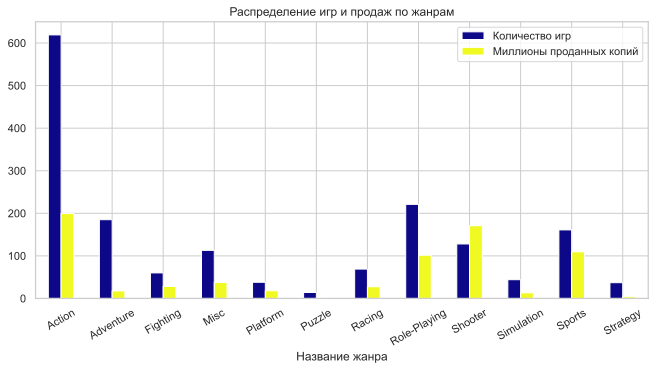

In [34]:
# построение графика распределения игр и продаж
genre_sales.plot(kind='bar', colormap='plasma')
plt.title('Распределение игр и продаж по жанрам')
plt.legend(['Количество игр', 'Миллионы проданных копий'])
plt.xticks(rotation=30)
plt.xlabel('Название жанра')
None

Мы видим, что больше всего выпускается и продается игр в жанре Action - более 600 игр и около 200 миллиона проданных копий, соответственно мы можем определить этот жанр как самый популярный. На следующем месте по продажам идет жанр Shooter - 171 миллион проданных копий при 128 выпущенных играх, затем Sports и Role-playing, которые были проданы в количестве 109 и 101 миллион копий соответственно. При этом по количеству выпущенных игр жанр Role_playing идет на втором месте - 221 игра, а на третьем месте идет жанр Adventure, при продажах всего 18 миллионов проданных копий.

Наименее популярным жанром является жанр Puzzle - всего 14 игр и около 2 миллиона продаж.

#### Вывод

Мы определили, что настоящий бум выпуска игр пришелся на 2008 и 2009 год, в эти года вышло примерно по 1400 игр в год.

Учитывая высокую динамичность рынка, мы сделали вывод, что для дальнейшего анализа нам потребуются данные по платформам, возникшим не ранее 3 лет назад по отношению к 2017 году, на который нам нужно сделать прогноз и запланировать рекламные кампании. Так мы сможем выделить успешные платформы, которые на 2017 год будут находиться в периоде финального роста или выйдут на плато. Таким образом, для анализа было принято взять данные за 2014 - 2016 года.

Платформы PS2, X360, PS3, Wii, DS и PS были определены, как платформы с наибольшими суммарными продажами за весь период. Мы определили, что срок жизни платформы в среднем составляет от 8 до 11 лет. При этом приблизительно до 2004 года новые платформы появлялись примерно каждые 5 лет, а около 2005 года популярные платформы DS, PS3, Wii и X360 стали выходить одна за одной, однако платформы PS3 и X360 оставались актуальными дольше, чем Wii и DS.

В 2015 и в 2016 году по продажам лидировали 3 платформы - XOne, PS4 и 3DS. 

Однако необходимо обратить внимание на то, что учитывая, что средний цикл жизни у платформы от 8 до 11 лет, платформы XOne и PS4 только появились в 2013 году, а платформа 3DS создалась ранее 2012 года и к 2016 году уже технически устарела, поэтому мы не можем ее считать потенциально прибыльной на 2017 год. А платформы XOne и PS4 c 2014 по 2015 год росли. Учитывая то, что за 2016 год у нас имеются еще не все данные, то платформы XOne и PS4 можно считать потенциальными на 2017 год.

Мы проанализировали зависимость продаж от отзывов критиков и пользоваталей у самой популряной платформы PS4 и у остальных платформ.
Мы обнаружили схожие тенденции. Продажи действительно зависят от отзывов критиков, но практически не зависят от отзывов пользователей. Однако наибольшее продажи встречаются на стыке высоких рейтингов как критиков, так и пользователей.

Проанализировав продажи по жанрам, мы увидели, что больше всего выпускается и продается игр в жанре Action - около 600 игр и около 200 миллионов проданных копий, соответственно мы можем определить этот жанр как самый популярный.

Наименее популярным жанром является жанр Puzzle - всего 14 игр и около 2 миллиона продаж.

### 4. Определение портрета пользователя по регионам

Составим портрет пользователя для каждого региона. Для этого нам необходимо определить топ 5 самых популярных платформ и топ 5 самых популярных жанров во всех регионах. Оценим разницу в долях продаж.

In [35]:
# создание функции для определения топ 5 платформ в регионе
def top_platforms(actual_data, platform, region):
    region_top_platforms = (
    actual_data.pivot_table(index=platform, 
                            values=region, 
                            aggfunc='sum')
               .sort_values(by=region, 
                        ascending=False)
               .head()
    )
    return region_top_platforms

# топ 5 жанров для каждого региона
na_top_platforms = top_platforms(actual_data, 'platform', 'na_sales')
eu_top_platforms = top_platforms(actual_data, 'platform', 'eu_sales')
jp_top_platforms = top_platforms(actual_data, 'platform', 'jp_sales')

# объединение топ 5 жанров всех регионов в одну таблицу 
na_eu_jp_top_platforms = na_top_platforms\
    .merge(eu_top_platforms, left_index=True, right_index=True, how='outer')\
    .merge(jp_top_platforms, how='outer', left_on='platform', right_on='platform')

na_eu_jp_top_platforms

,na_sales,eu_sales,jp_sales
platform,,,
3DS,22.64,16.12,44.24
PC,NaN,17.97,NaN
PS3,22.05,25.54,11.22
PS4,98.61,130.04,15.02
X360,28.30,NaN,NaN
XOne,81.27,46.25,NaN
PSV,NaN,NaN,14.54
WiiU,NaN,NaN,7.31


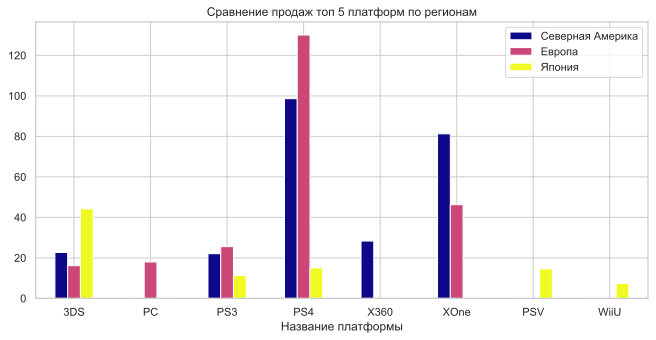

In [36]:
# построение графика продаж топ 5 платформ по регионам
na_eu_jp_top_platforms.plot(kind='bar', colormap='plasma')
plt.title('Сравнение продаж топ 5 платформ по регионам')
plt.legend(["Северная Америка", "Европа", "Япония"])
plt.xticks(rotation=0)
plt.xlabel('Название платформы')
None

Проанализировав график мы видим, что пользователи из Северной Америки предпочитают играть на PS4. Продажи игр на этой платформе составляют около 100 миллионов копий. В то же время пользователи из Европы купили на этой же платформе более 120 миллионов копий игр. На втором месте в Америке платформа XOne - около 80 миллионов проданных копий, за ней идет платформа X360 и 28 миллионов проданных копий.

У пользователей из Европы на втором месте так же платформа XOne - более 40 миллионов проданных копий, а вот платформа X360 даже не входит в топ 5 самых популярных платформ. На третьем месте в Европе идет платформа PS3.

Однако у пользователей из Японии мы наблюдаем совсем другую картину. В топ 5 платформ в Японии не входит ни XOne, ни X360. На первом месте в Японии покупают игры на платформу 3DS - почти 44 миллиона копий. На втором месте идет платформа PS4 - 15 миллионов копий, на третьем месте также идет непопулярная на остальных рынках платформа - PSV. Такую популярность платформ Nintendo 3DS и PlayStation Vita на японском рынке можно объяснить их японским происхождением.

Определим и исследуем топ 5 популярных жанров на разных рынках.

In [37]:
# создание функции для определения топ 5 жанров в регионе
def top_genres(actual_data, genre, region):
    region_top_genres = (
    actual_data.pivot_table(index=genre, 
                            values=region, 
                            aggfunc='sum')
               .sort_values(by=region, 
                        ascending=False)
               .head()
    )
    return region_top_genres

# топ 5 жанров для каждого региона
na_top_genres = top_genres(actual_data, 'genre', 'na_sales')
eu_top_genres = top_genres(actual_data, 'genre', 'eu_sales')
jp_top_genres = top_genres(actual_data, 'genre', 'jp_sales')

# объединение топ 5 жанров всех регионов в одну таблицу 
na_eu_jp_top_genres = na_top_genres\
    .merge(eu_top_genres, left_index=True, right_index=True, how='outer')\
    .merge(jp_top_genres, how='outer', left_on='genre', right_on='genre')

na_eu_jp_top_genres

,na_sales,eu_sales,jp_sales
genre,,,
Action,72.53,74.68,29.58
Misc,15.05,NaN,5.61
Racing,NaN,14.13,NaN
Role-Playing,33.47,28.17,31.16
Shooter,79.02,65.52,4.87
Sports,46.13,45.73,NaN
Fighting,NaN,NaN,6.37


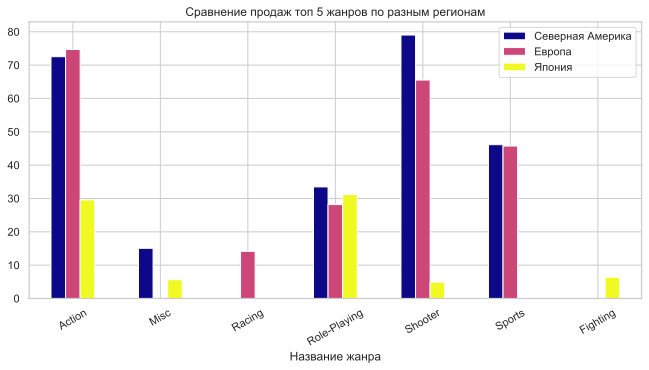

In [38]:
# построение графика продаж топ 5 жанров по регионам
na_eu_jp_top_genres.plot(kind='bar', colormap='plasma')
plt.title('Сравнение продаж топ 5 жанров по разным регионам')
plt.legend(["Северная Америка", "Европа", "Япония"])
plt.xticks(rotation=30)
plt.xlabel('Название жанра')
None

В структуре продаж топ 5 жанров по регионам также наблюдается тенденция того, что пользователи из Северной Америки и Европы покупают одни и те же жанры игр, в то время, как пользователи из Японии покупают другие. Так, например, американцы и европейцы больше всего покупают игры жанров Shooter и Action. Пользователи из Японии больше всего покупают игры жанра Role-playing и Action - около 30 миллионов копий.

Отдельно хотелось бы отметить то, что жанр Misc не входит в топ 5 в Европе, жанр Racing входит только в топ 5 Европы на 5 месте, а жанр Fighting входят только в топ 5 японского рынка.

Особенность популярности нетипичных для европейского и американсеого пользователя жанров на японском рынке можно объяснить культурными особенностями жителей Японии.

Помимо отзывов критиков и пользователей, у нас есть информация о рейтинге ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков». Проанализируем и оценим влияет ли рейтинг ESRB на продажи в отдельном регионе. 

,na_sales,eu_sales,jp_sales
rating,,,
E,50.74,58.06,8.94
E10+,33.23,26.16,4.46
M,96.42,93.44,8.01
T,38.95,34.07,14.78
no rating,64.72,58.95,56.90


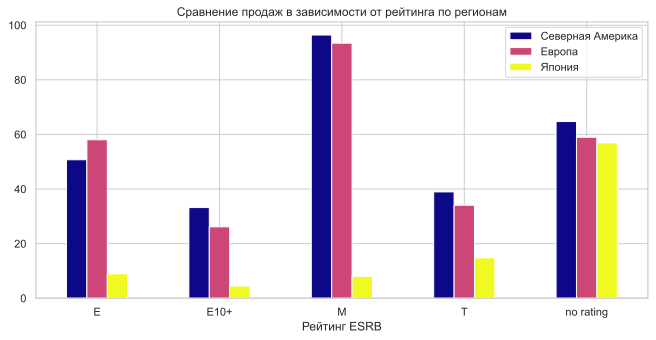

In [39]:
# сведение таблицы с продажами по рейтингу по регионам
esrb_actual_data = actual_data.loc[actual_data.rating != 0]

esrb_group_actual_data = esrb_actual_data.pivot_table(index='rating', 
                                                      values=['na_sales', 'eu_sales', 'jp_sales'], 
                                                      aggfunc='sum')
esrb_group_actual_data = esrb_group_actual_data.reindex(columns=['na_sales', 'eu_sales', 'jp_sales'])

# построение графика продаж в зависимости от рейтинга по регионам
esrb_group_actual_data.plot(kind='bar', colormap='plasma')
plt.title('Сравнение продаж в зависимости от рейтинга по регионам')
plt.legend(["Северная Америка", "Европа", "Япония"])
plt.xticks(rotation=0)
plt.xlabel('Рейтинг ESRB')
None

esrb_group_actual_data

Для начала определим, что значит каждая буква рейтинга:

* **«E» («Everyone») — «Для всех»**: Содержание вполне подходит для всех возрастов. Такие игры могут понравиться и взрослым. Игры с этим рейтингом могут содержать минимальное насилие, в основном «мультяшного» характера. Первой игрой, которая получила данный рейтинг, стала The Simpsons Cartoon Studio, выпущенная в 1996 году.

* **«E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше»**: Проекты с данным рейтингом могут содержать или немного больше мультипликационного или мягкого насилия, или несколько откровенные сцены, или минимальное количество крови. Рейтинг был принят ESRB 2 марта 2005 года. Первой игрой, которая получила данный рейтинг, стала Donkey Kong: Jungle Beat.

* **«T» («Teen») — «Подросткам»** - Игра подходит для лиц от 13 лет. Проекты из данной категории могут содержать насилие, непристойные сцены, грубый юмор, в меру откровенное сексуальное содержимое, кровь или нечастое использование ненормативной лексики.

* **«M» («Mature») — «Для взрослых»**: Материалы игры не подходят для лиц младше 17 лет. Проекты с данным рейтингом могут содержать достаточно жестокое насилие, большое количество крови с расчленением, непристойные сексуальные сцены или грубую ненормативную лексику, нежелательную для младшей аудитории.

Напоминаем, что отдельной категорий **no rating** мы заполнили пропуски в значениях в данном столбце.
    

Таким образом, мы видим, что в Северной Америке и Европе преобладают продажи игры с рейтингом "Для взрослых" - около 200 миллионов проданных копий, затем идут игры с рейтингом "Для всех" - по 113 миллионов проданных копий. Игры с рейтингами "Для подростков" и "Для всех от 10 лет и старше" делят третье и четвертое места на европейском и североамериканском рынках - более 50 миллионов копий.

В Японии игры с рейтингами - "Для всех", "Подросткам" и "Для взрослых" продаются плюс минус на схожем уровне - 28, 26 и 21 миллион проданных копий. Игры с рейтингом "Для всех от 10 лет и старше" отстают от остальных - всего 8 миллионов проданных копий.

При этом отдельная особенность отмечается у всех рынков - игры без рейтинга продаются на первом месте в Японии, и на втором месте на рынке Северной Америки и Европы - около 60 миллионов проданных копий.

#### Вывод

Таким образом, мы видим схожесть портретов пользователей из Северной Америки и Европы, но отмечаем значительные расхождения с портретом пользователя из Японии.

Пользователи из Северной Америки и Европы предпочитают игры на платформах XOne и PS4, а жанры Action и Shooters, и рейтингом "Для взрослых" или "для всех. 

В то время как пользователи из Японии предпочитают играть на японских платформах Nintendo 3DS, PS4 и PlayStation Vita, в жанры Role-playing и Action, с рейтингом "Для всех", "Подросткам" и "Для взрослых". При этом отдельная особенность отмечается у всех рынков - игры без рейтинга продаются на первом месте в Японии, и на втором месте на рынке Северной Америки и Европы - около 60 миллионов проданных копий.

Такие различия в портретах пользователей можно объяснить культурной схожестью пользователей из Северной Америки и Европы, и значительными культурными отличиями японских пользователей от западных.

### 5. Проверка гипотез

#### Сравнение средних пользовательских рейтингов платформ Xbox One и PC.

Первая гипотеза, которую нам необходимо проверить - это гипотеза о том, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые. 

Перед тем, как проверять гипотезу - проверим на нормальность распределение пользовательских рейтингов данных платформ. Для начала оценим ее графически, для этого построим график оценки распределения по выборке и боксплоты выборок. Отфильруем значения равные нулю, так как это были пропущенные значения, которые мы заполняли.

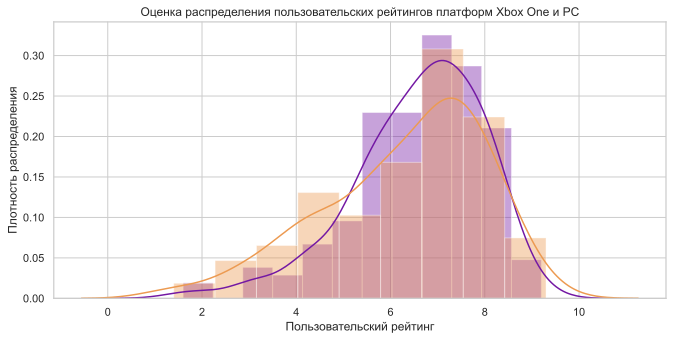

In [40]:
# создание новых переменных, включающих в себя значения пользовательских рейтингов платформ Xbox One и PC не равнях нулю
xbox_one_user_score = actual_data.loc[(actual_data['platform'] == 'XOne') & (actual_data['user_score'].isna() == False), ['user_score']]
pc_user_score = actual_data.loc[(actual_data['platform'] == 'PC') & (actual_data['user_score'].isna() == False), ['user_score']]

# построение графика оценки распределения по выборке
sns.distplot(xbox_one_user_score, color='#7318a3')
sns.distplot(pc_user_score, color='#ec9a51')
plt.title('Оценка распределения пользовательских рейтингов платформ Xbox One и PC')
plt.xlabel('Пользовательский рейтинг')
plt.ylabel('Плотность распределения')
None

Мы видим, что распределения скошены влево. Построим ящики с усами для более точного предположения относительно нормальности распределения, потому что на нём более четко прослеживаются основные свойства.

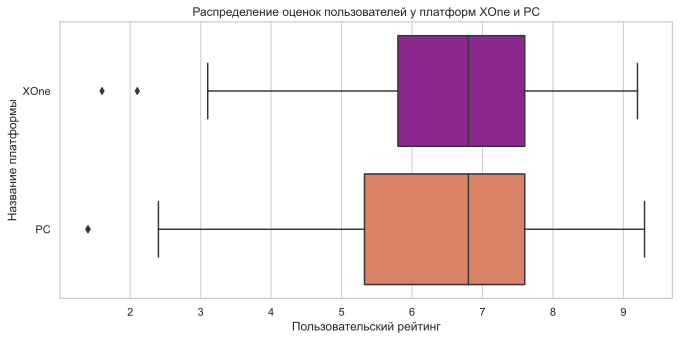

In [41]:
# создание новой переменной, включающей в себя значения пользовательских рейтингов платформ Xbox One и PC не равнях нулю
xbox_one_and_pc_user_score = actual_data.loc[(actual_data['platform'] == 'PC') | \
                                             (actual_data['platform'] == 'XOne') & \
                                             (actual_data['user_score'].isna() == False)]
                                             
sns.boxplot(x='user_score', y='platform', data=xbox_one_and_pc_user_score, palette='plasma', orient="h")
sns.set(style='whitegrid')
plt.title('Распределение оценок пользователей у платформ XOne и PC')
plt.xlabel('Пользовательский рейтинг')
plt.ylabel('Название платформы')
None

Мы видим, что распределение оценок пользователей платформы Xbox One, судя графику немного похоже на нормальное, так как усы визуально равноудалены от первого и третьего квартилей, но в распределении присутствуют редкие выбросы. Распределение же оценок пользователей платформы PC не выглядит нормальным, значения смещены влево. 

Так как по первым двум графикам, мы можем сказать, что значения оценок пользователей платформы PC не распределены нормально, но не можем быть уверенными в типе распределения оценок пользователей платформы Xbox One, проверим распределения при помощи критерия Шапиро-Уилка. 

Критерий Шапиро-Уилка:

$\begin{equation*}
 \begin{cases}
   H_0 :\text{Средние оценки пользователей платформ Xbox One/PC распределены нормально}\\
   H_1 :\text{Средние оценки пользователей платформ Xbox One/PC распределены не нормально}
 \end{cases}
\end{equation*}$

In [42]:
# критерий значимости
alpha=0.05

In [43]:
print("Shapiro-Wilk normality test, W-statistic: %f, p-value: %f" % st.shapiro(xbox_one_user_score))

Shapiro-Wilk normality test, W-statistic: 0.953164, p-value: 0.000026


In [44]:
print("Shapiro-Wilk normality test, W-statistic: %f, p-value: %f" % st.shapiro(pc_user_score))

Shapiro-Wilk normality test, W-statistic: 0.949691, p-value: 0.000180


Мы видим, что pvalue обеих выборок меньше заданного уровня значимости, то у нас есть достаточные основания отвергнуть нулевую гипотезу о том, что наша выборка пришла из нормального распределения. 

Так как распределения значений отличаются от нормального, для проверки гипотезы будем использовать непараметрический тест Манна-Уитни.

Для начала сформулируем нулевую и альтернативную гипотезы:

$\begin{equation*}
 \begin{cases}
   H_0 :\text{Средние пользовательские рейтинги платформ Xbox One и PC равны}\\
   H_1 :\text{Средние пользовательские рейтинги платформ Xbox One и PC не равны}
 \end{cases}
\end{equation*}$

Уровень значимости: $\alpha = 0.01$, так как у нас небольшое количество значений в двух выборках, поэтому сложнее получить достоверную статистическую значимость.

Посчитаем p-value, используя ttest из библиотеки scipy для сравнения средних двух выборок.

Если p-value будет меньше выбранного уровня значимости $\alpha = 0.01$, то нулевую гипотезу о равенстве средних отвергнем. Иначе сделаем вывод, что данные не позволили нам отвергнуть нулевую гипотезу.

In [45]:
# непараметрический тест Манна_Уитни
alpha=0.01

results = st.mannwhitneyu(xbox_one_user_score, pc_user_score, alternative='two-sided')
print('p-значение: ', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение:  [0.2775287]
Не получилось отвергнуть нулевую гипотезу


Значение pvalue больше заданного уровня значимости, значит мы не можем отвергнуть нулевую гипотезу, это значит, что с большой долей вероятности средние пользовательские рейтинги платформ XOne и PC не имеют статистически значимых отличий.

#### Сравнение средние пользовательские рейтинги жанров Action и Sports

Вторая гипотеза, которую нам необходимо проверить - это гипотеза о том, что средние пользовательские рейтинги жанров Action и Sports разные.

Перед тем, как проверять гипотезу - проверим на нормальность распределение пользовательских рейтингов данных жанров. Для начала оценим ее графически, для этого построим график оценки распределения по выборке и боксплоты выборок. Отфильруем значения равные нулю, так как это были пропущенные значения, которые мы заполняли.

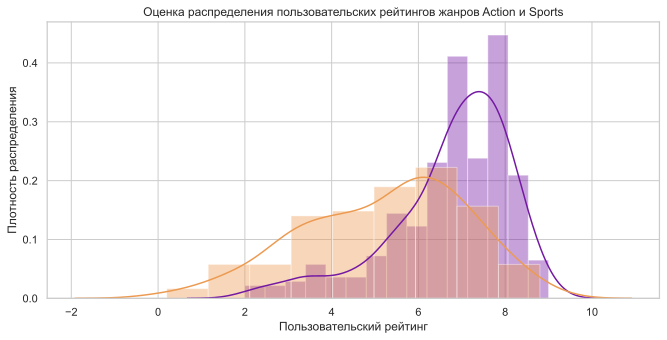

In [46]:
# создание новых переменных, включающих в себя значения пользовательских рейтингов жанров Action и Sports не равнях нулю
action_user_score = actual_data.loc[(actual_data['genre'] == 'Action') & (actual_data['user_score'].isna() == False), ['user_score']]
sports_user_score = actual_data.loc[(actual_data['genre'] == 'Sports') & (actual_data['user_score'].isna() == False), ['user_score']]

# построение графика оценки распределения по выборке
sns.distplot(action_user_score, color='#7318a3')
sns.distplot(sports_user_score, color='#ec9a51')
plt.title('Оценка распределения пользовательских рейтингов жанров Action и Sports')
plt.xlabel('Пользовательский рейтинг')
plt.ylabel('Плотность распределения')
None

Мы видим, что так же как и в случае с платформами, распределения скошены влево. Построим ящики с усами для более точного предположения относительно нормальности распределения, потому что на нём более четко прослеживаются основные свойства.

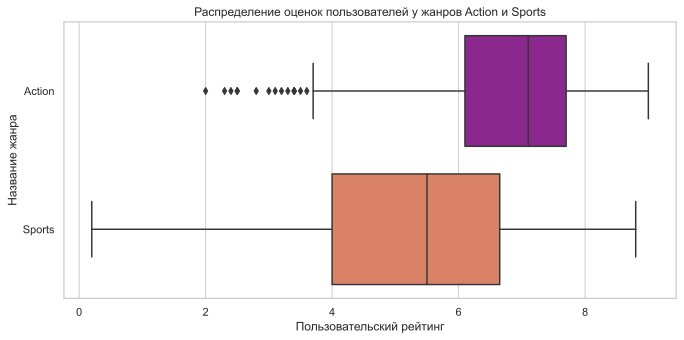

In [47]:
# создание новой переменной, включающей в себя значения пользовательских рейтингов жанров Action и Sports не равнях нулю
action_and_sports_user_score = actual_data.loc[(actual_data['genre'] == 'Action') | \
                                               (actual_data['genre'] == 'Sports') & \
                                               (actual_data['user_score'].isna() == False)]
                                             
sns.boxplot(x='user_score', y='genre', data=action_and_sports_user_score, palette='plasma', orient="h")
sns.set(style='whitegrid')
plt.title('Распределение оценок пользователей у жанров Action и Sports')
plt.xlabel('Пользовательский рейтинг')
plt.ylabel('Название жанра')
None

Мы видим, что график оценки пользователей жанров Action и Sports говорит нам о том, что оба эти распределения не являются нормальными. 

Для того, чтобы убедиться в этом, проверим распределения при помощи критерия Шапиро-Уилка. 

Критерий Шапиро-Уилка:

$\begin{equation*}
 \begin{cases}
   H_0 :\text{Средние оценки пользователей жанров Action/Sports распределены нормально}\\
   H_1 :\text{Средние оценки пользователей жанров Action/Sports распределены не нормально}
 \end{cases}
\end{equation*}$

In [48]:
# критерий значимости
alpha=0.05

In [49]:
print("Shapiro-Wilk normality test, W-statistic: %f, p-value: %f" % st.shapiro(action_user_score))

Shapiro-Wilk normality test, W-statistic: 0.906814, p-value: 0.000000


In [50]:
print("Shapiro-Wilk normality test, W-statistic: %f, p-value: %f" % st.shapiro(sports_user_score))

Shapiro-Wilk normality test, W-statistic: 0.977774, p-value: 0.034662


Мы видим, что pvalue обеих выборок меньше заданного уровня значимости, то у нас есть достаточные основания отвергнуть нулевую гипотезу о том, что наша выборка пришла из нормального распределения. 

Так как распределения значений отличаются от нормального, для проверки гипотезы будем использовать непараметрический тест Манна-Уитни.

Для начала сформулируем нулевую и альтернативную гипотезы:

$\begin{equation*}
 \begin{cases}
   H_0 :\text{Средние пользовательские рейтинги жанров Aсtion и Sports равны}\\
   H_1 :\text{Средние пользовательские рейтинги жанров Aсtion и Sports не равны}
 \end{cases}
\end{equation*}$

Уровень значимости: $\alpha = 0.01$, так как у нас небольшое количество значений в двух выборках, поэтому сложнее получить достоверную статистическую значимость.

Посчитаем p-value, используя ttest из библиотеки scipy для сравнения средних двух выборок.

Если p-value будет меньше выбранного уровня значимости $\alpha = 0.01$, то нулевую гипотезу о равенстве средних отвергнем. Иначе сделаем вывод, что данные не позволили нам отвергнуть нулевую гипотезу. 

In [51]:
# непараметрический тест Манна_Уитни
alpha=0.01

results = st.mannwhitneyu(action_user_score, sports_user_score, alternative='two-sided')
print('p-значение: ', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение:  [1.21668793e-16]
Отвергаем нулевую гипотезу


Значение pvalue меньше заданного уровня значимости, значит мы можем отвергнуть нулевую гипотезу. Соответственно с большой долей вероятности средние пользовательские рейтинги женров Action и Sports имеют статистически значимые отличия.

#### Вывод

Мы проверили две гипотезы и выяснили, что  
1. С большой долей вероятности средние пользовательские рейтинги платформ XOne и PC не имеют статистически значимых отличий.
2. С большой долей вероятности средние пользовательские рейтинги женров Action и Sports имеют статистически значимые отличия.

### Общий вывод

Мы проанализировали исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). 

На этапе предобработки данных нами были обнаружены пропуски данных в различных столбцах, возникших по разным причинам. 

Так, пропуски в столбцах `name` и `genre` были вероятнее всего допущены в связи с тем, что эти 2 игры были выпущены аж в 1993. Эти пропуски мы удалили, так как их было всего 2 строки.

Мы обнаружили пропущенные значения в столбце с годом релиза игры. Заполнить данные пропуски нам не представилось возможным, так как на разных платформах игры могут выходить с разницей в несколько лет, а год в названии игры не всегда говорит о том, что игра вышла именно в этот год. Было отмечено, что практически у всех игр из данного среза маленькая выручка с продаж, а так как общее количество пропущенных значений в данном столбце составляет 1,6%, мы удалили данные пропуски.

В столбцах `user_score` и `rating` пропущено примерно 40% значений, а в столбце `critic_score` около половины всех значений. Удалить такое количество пропусков мы не смогли, так как это значительно повлияло бы на исследование. Также, в столбце с оценками пользователей мы обнаружили аномальное значение "tbd", которое говорит о том, что рейтинг будет подгружен, но позже. На данном этапе заполнить данные пропуски и не исказить результаты исследования не представлялось возможным, поэтому мы оставили их как есть. Значения 'tbd' заменили на пропуски, так как их мы также не можем заполнить достоверно. Пропущенные значения в столбце `'rating'` заменили на `'no rating'`.

Перед нами стояла задача - выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании. Мы провели исследовательский анализ данных, в котором мы определили, что настоящий бум выпуска игр пришелся на 2008 и 2009 год, в эти года вышло примерно по 1400 игр в год.

Учитывая высокую динамичность рынка, мы сделали вывод, что для дальнейшего анализа нам потребуются данные по платформам, возникшим не ранее 3 лет назад по отношению к 2017 году, на который нам нужно сделать прогноз и запланировать рекламные кампании. Так мы сможем выделить успешные платформы, которые на 2017 год будут находиться в периоде финального роста или выйдут на плато. Таким образом, для анализа было принято взять данные за 2014 - 2016 года.

Платформы PS2, X360, PS3, Wii, DS и PS были определены, как платформы с наибольшими суммарными продажами за весь период. Мы определили, что срок жизни платформы в среднем составляет от 8 до 11 лет. При этом приблизительно до 2004 года новые платформы появлялись примерно каждые 5 лет, а около 2005 года популярные платформы DS, PS3, Wii и X360 стали выходить одна за одной, однако платформы PS3 и X360 оставались актуальными дольше, чем Wii и DS.

В 2015 и в 2016 году по продажам лидировали 3 платформы - XOne, PS4 и 3DS. 

Однако необходимо обратить внимание на то, что учитывая, что средний цикл жизни у платформы от 8 до 11 лет, платформы XOne и PS4 только появились в 2013 году, а платформа 3DS создалась ранее 2012 года и к 2016 году уже технически устарела, поэтому мы не можем ее считать потенциально прибыльной на 2017 год. А платформы XOne и PS4 c 2014 по 2015 год росли. Учитывая то, что за 2016 год у нас имеются еще не все данные, то платформы XOne и PS4 можно считать потенциальными на 2017 год.

Мы проанализировали зависимость продаж от отзывов критиков и пользоваталей у самой популряной платформы PS4 и у остальных платформ.
Мы обнаружили схожие тенденции. Продажи действительно зависят от отзывов критиков, но практически не зависят от отзывов пользователей. Однако наибольшее продажи встречаются на стыке высоких рейтингов как критиков, так и пользователей.

Проанализировав продажи по жанрам, мы увидели, что больше всего выпускается и продается игр в жанре Action - около 600 игр и около 200 миллионов проданных копий, соответственно мы можем определить этот жанр как самый популярный.

Мы составили портреты покупателей из разных регионов и отметили схожесть портретов пользователей из Северной Америки и Европы, но значительные расхождения с портретом пользователя из Японии.

Пользователи из Северной Америки и Европы предпочитают игры на платформах XOne и PS4, а жанры Action и Shooters, и рейтингом "Для взрослых" или "для всех". В то время как пользователи из Японии предпочитают играть на японских платформах Nintendo 3DS, PS4 и PlayStation Vita, в жанры Role-playing и Action, с рейтингом "Для всех", "Подросткам" и "Для взрослых". При этом отдельная особенность отмечается у всех рынков - игры без рейтинга продаются на первом месте в Японии, и на втором месте на рынке Северной Америки и Европы - около 60 миллионов проданных копий. Такие различия в портретах пользователей можно объяснить культурной схожестью пользователей из Северной Америки и Европы, и значительными культурными отличиями японских пользователей от западных.

Мы проверили две гипотезы и установили:
  
1. С большой долей вероятности средние пользовательские рейтинги платформ XOne и PC не имеют статистически значимых отличий.
2. С большой долей вероятности средние пользовательские рейтинги женров Action и Sports имеют статистически значимые отличия.

Таким образом, мы можем сделать вывод о том, на успех игры могут вляить разные факторы, в том числе оценки критиков, платформа, на которой выпускается игра, жанр, а так же прегион продаж. Все эти признаки необходимо учитывать при определении потенциально популярного продукта и планировании рекламных кампаний. 

На 2017 год мы бы рекомендовали делать ставку на платформы XOne и PS4, жанры Action и Shooters, рейтингами "Для взрослых", "Для всех" и игры без рейтинга на североамериканском и европейском рынках. А на японском рынке потенциальными будут игры на платформах Nintendo 3DS, PS4 и PlayStation Vita, жанров Role-playing и Action без рейтинга.